
# Introducción 

Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

# Recordatorio

K-means es un método de clustering particional.
Para poder utilizarlo, debemos especificar el número de grupos que queremos encontrar.
A este número de grupos, se le denomina K.

# Contexto

Se han elegido a 140 “famosos” del mundo en diferentes áreas: deporte, cantantes, actores, etc. Basado en una metodología de psicología conocida como “Ocean: The Big Five” tendemos como características de entrada:



*   usuario (el nombre en Twitter)
*   “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
*   “co” =Conscientiousness – grado de orden, prolijidad, organización
*   “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
*   “ag” = Agreeableness – grado de empatía con los demás, temperamento
*   “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
*   Wordcount – Cantidad promedio de palabras usadas en sus tweets
*   Categoria – Actividad laboral del usuario (actor, cantante, etc.)

Utilizaremos el algoritmo K-means para que agrupe estos usuarios -no por su actividad laboral- si no, por sus similitudes en la personalidad. Si bien tenemos 8 columnas de entrada, sólo utilizaremos 3 en este ejemplo, de modo que podamos ver en un gráfico tridimensional -y sus proyecciones a 2D- los grupos resultantes. Pero para casos reales, podemos utilizar todas las dimensiones que necesitemos. Una de las hipótesis que podríamos tener es: “Todos los cantantes tendrán personalidad parecida” (y así con cada rubro laboral). Pues veremos si lo probamos, o por el contrario, los grupos no están relacionados necesariamente con la actividad de estas Celebridades.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Cargamos los datos de entrada del archivo csv

In [4]:
dataframe = pd.read_csv(r"C:/Personal/Docencia/Introducción al machine learning 2024/analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


#ANALIZAR

Revisa la siguiente tabla y explica lo que está mostrando

In [6]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [7]:
#vemos cuantos usuarios hay de cada categoria
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Las categorias son: 1-actores 2-cantantes 3-modelo 4-TV 5-radio 6-tecnología 7-deportes 8-politica 9-escritor

## Visualizamos los datos

#ANALIZAR

¡Qué están indicando los siguientes gráficos?

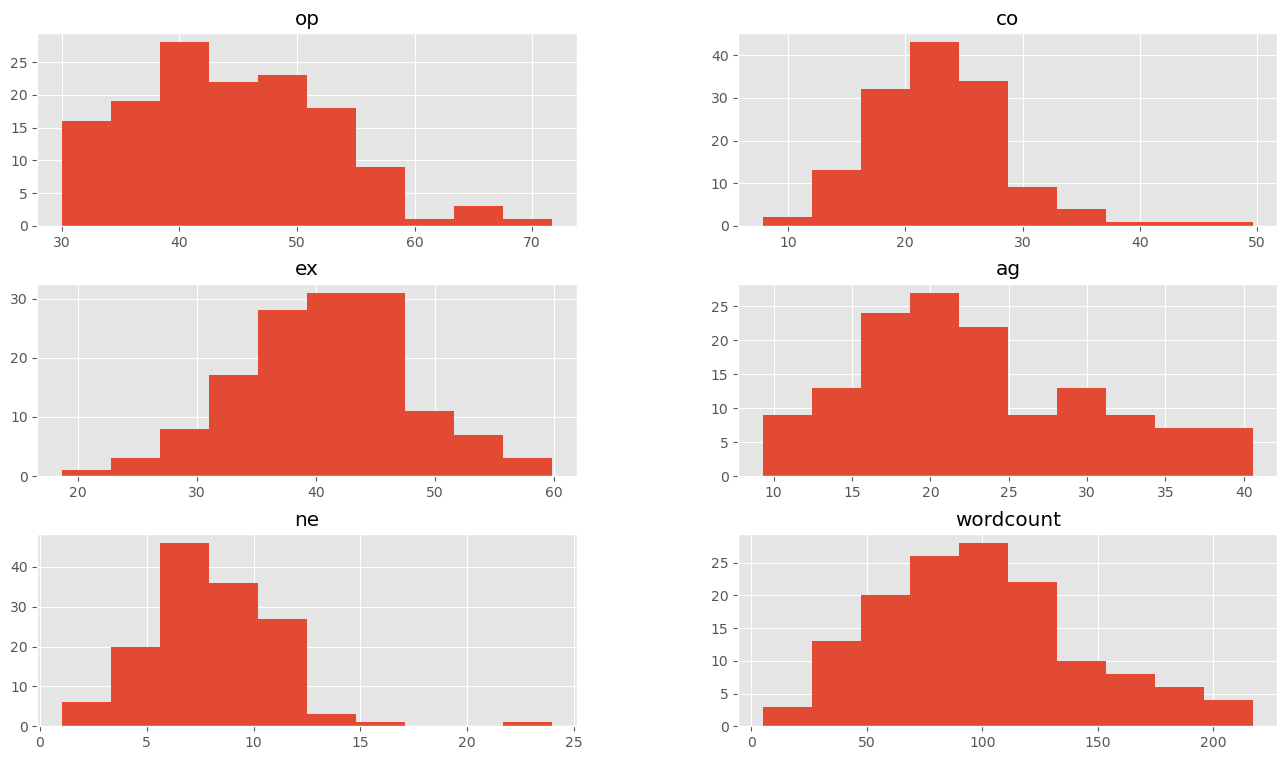

In [10]:
dataframe.drop(['categoria'], axis=1).hist()
plt.show()

#ANALIZAR

En este caso seleccionamos 3 dimensiones: op, ex y ag y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

¿Qué puedes comentar de los siguientes gráficos?

¿Qué puedes comentar de la correlación?

C:\Users\m_mir\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


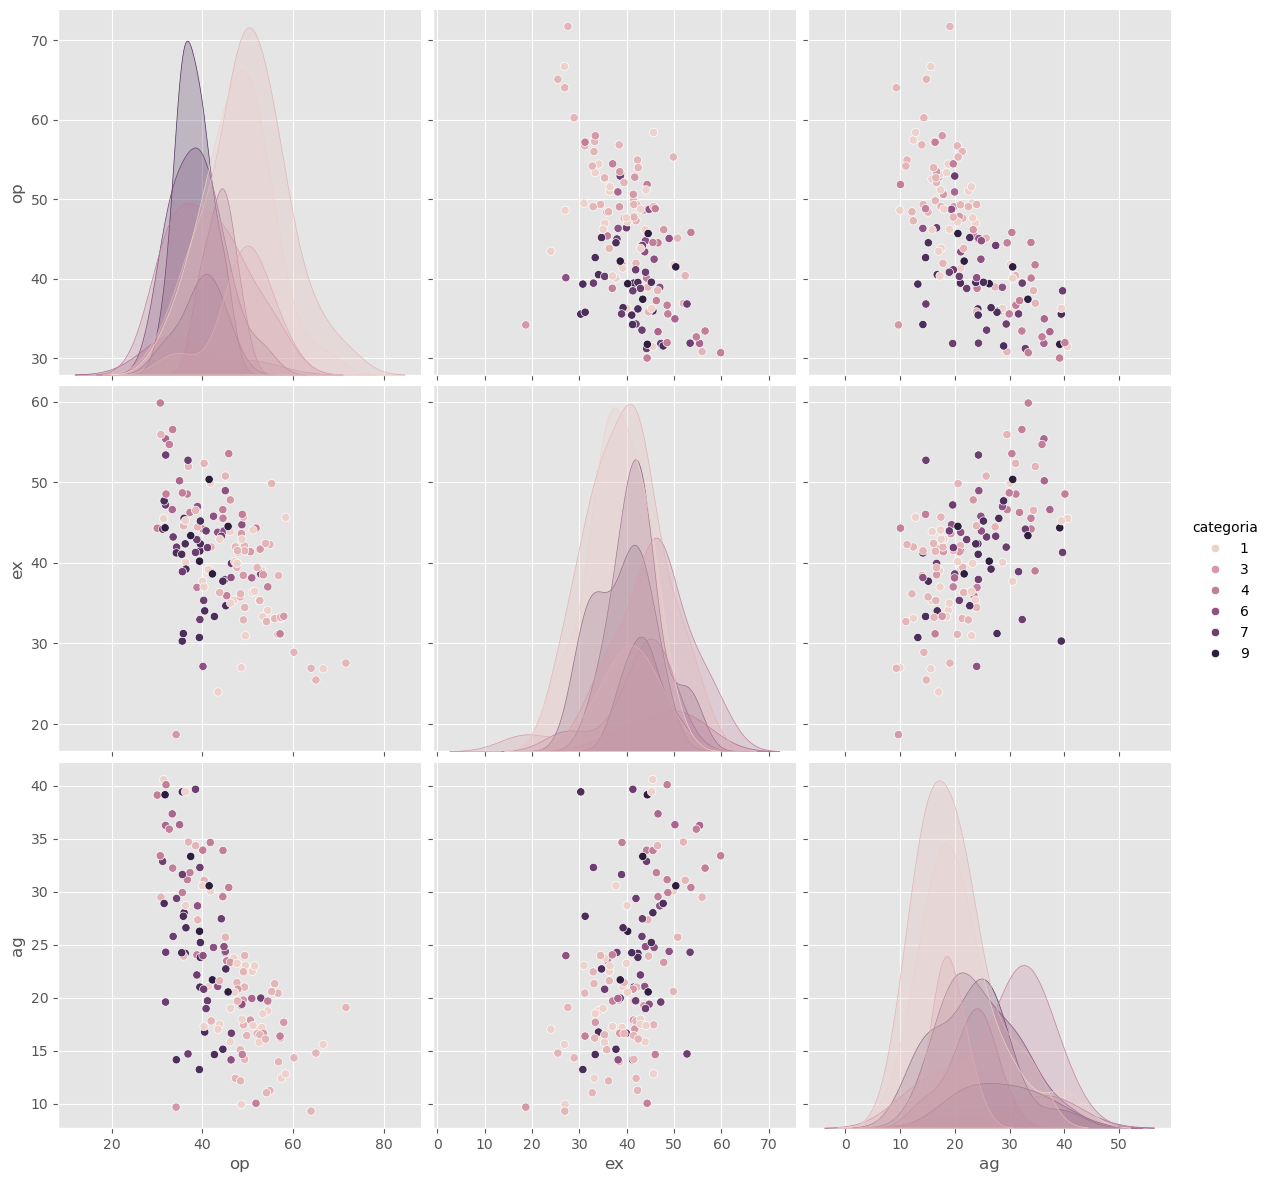

In [12]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

## Creamos el modelo

Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, sólo cargamos las columnas op, ex y ag en nuestra variable X.

In [14]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["op","ex"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 2)

In [15]:
# Escalado de datos
# ==============================================================================
from sklearn.preprocessing import scale
X_scaled = scale(X)

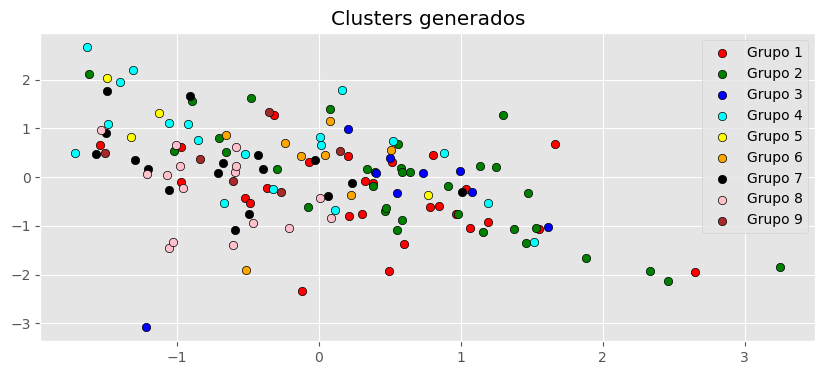

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))

color=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
# Grupos originales
for i in np.unique(y):
    ax.scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1],
        c = color[i], #plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax.set_title('Clusters generados')
ax.legend();

Ahora veremos una gráfica en 3D con 9 colores representando las categorías.

In [18]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

<Figure size 1600x900 with 0 Axes>

# Buscamos el valor K

Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo”.

Explica que indica el "punto de codo"....

C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

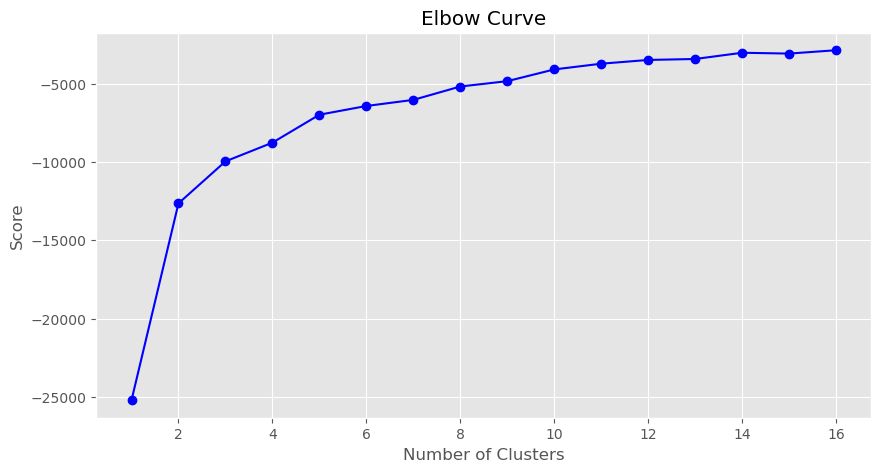

In [21]:
plt.subplots(figsize=(10, 5))
Nc = range(1, 17)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, 'bx-', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

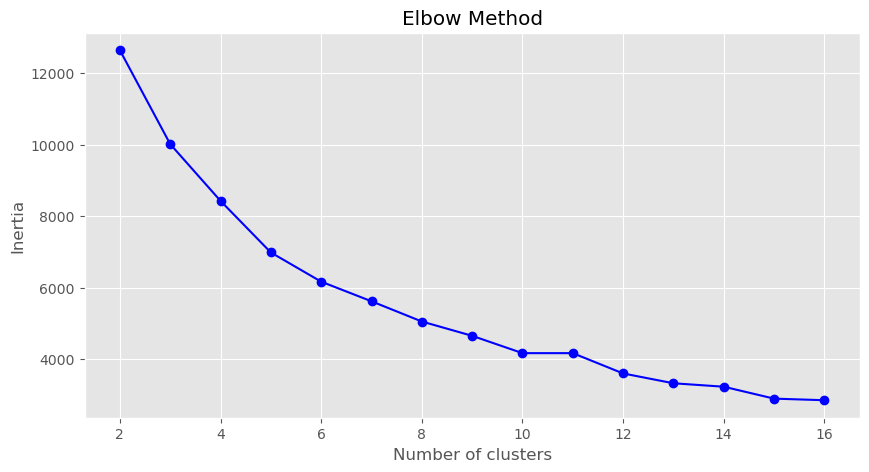

In [22]:
plt.subplots(figsize=(10, 5))
inertia = list()
for i in range(2, 17):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 17), inertia, 'bx-', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Buscamos el valor de K haciendo una gráfica e intentando hallar la mayor cohesión o medida de silhouette


C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

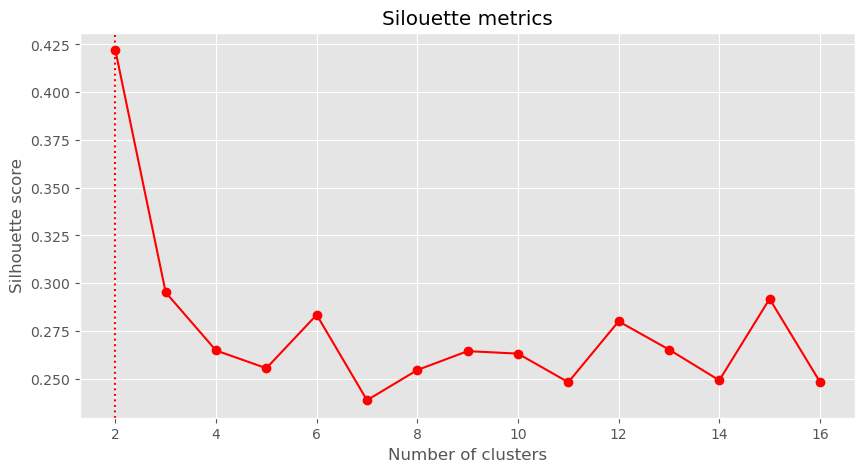

In [24]:
plt.subplots(figsize=(10, 5))
from sklearn.metrics import silhouette_score

sil_scores = list()
for i in range(2, 17):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 17), sil_scores, color = 'red', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silouette metrics')
plt.axvline(x = sil_scores.index(max(sil_scores))+2, linestyle = 'dotted', color = 'red') 
plt.show()

#ANALIZAR

Para el ejercicio, elegiremos 5 como un buen valor de K. 

¿Podría ser otro?, prueba con varios y ve los efectos....

In [26]:
n_digits = 6
kmeans = KMeans(n_clusters=n_digits).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[41.39436996 35.40639221 19.56565683]
 [33.82612633 49.59771714 34.58263219]
 [53.07558864 34.63000472 17.78670176]
 [65.5299666  27.1434742  14.6252708 ]
 [39.24317394 43.86226053 27.87658174]
 [49.20715258 42.67516426 17.65113532]]


C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster).

In [28]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan', 'black']#,'yellow','orange','black','pink','brown']
#colores=['red','green','blue','cyan','yellow','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

<Figure size 1600x900 with 0 Axes>

# ANALIZAR

Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 

¿ Hay alguna una relación en los grupos con sus actividades de Celebrity?

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificació.

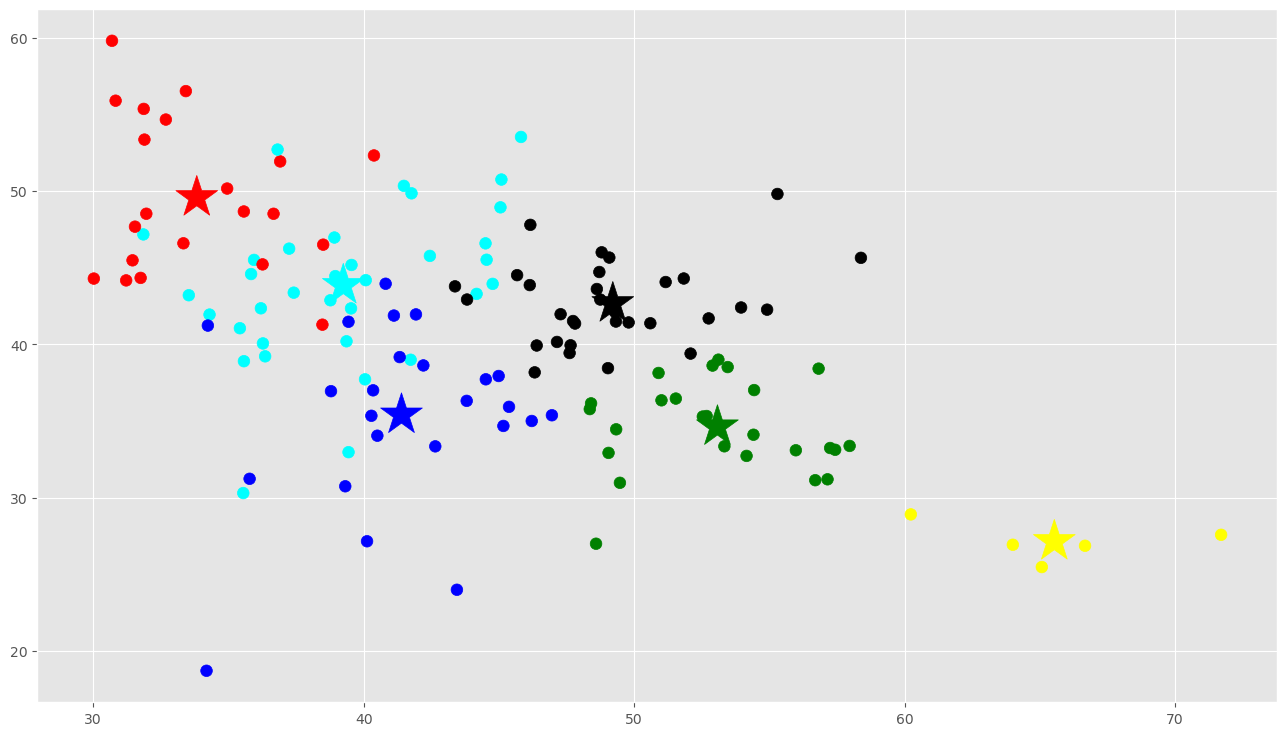

In [30]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
#colores=['blue','red','green','yellow','cyan']

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

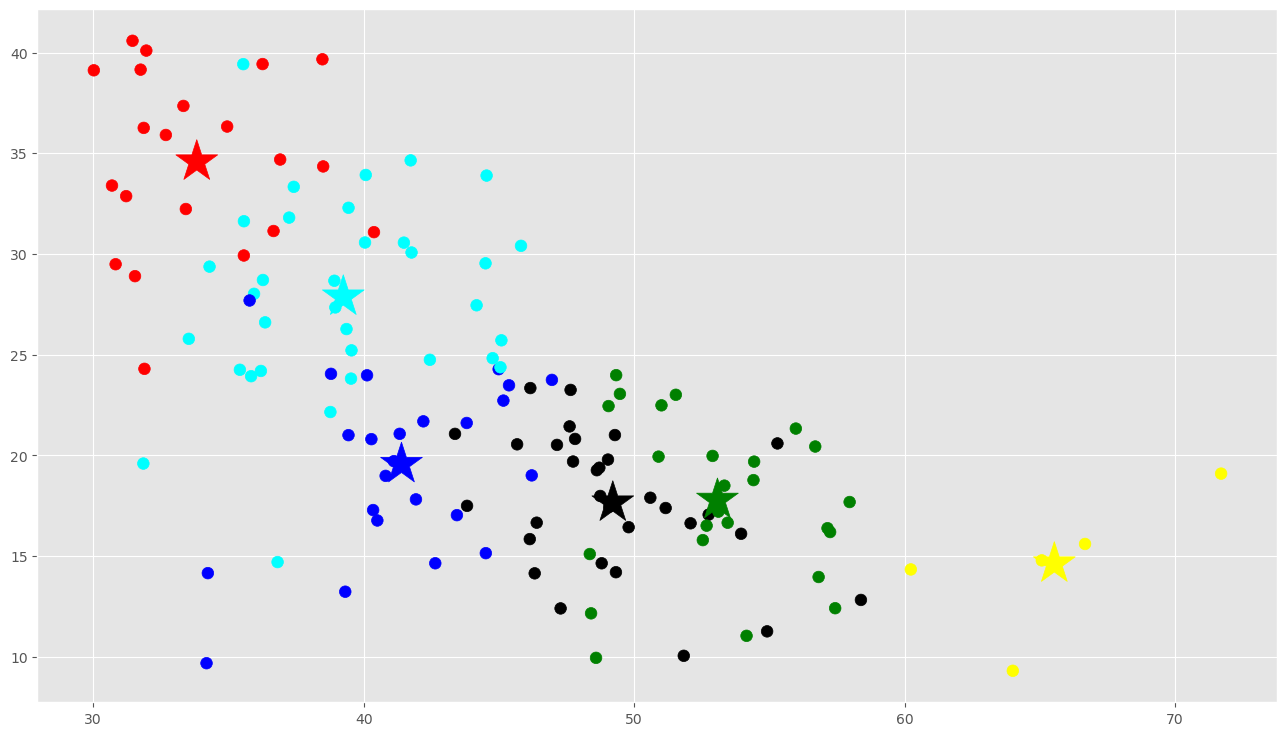

In [31]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

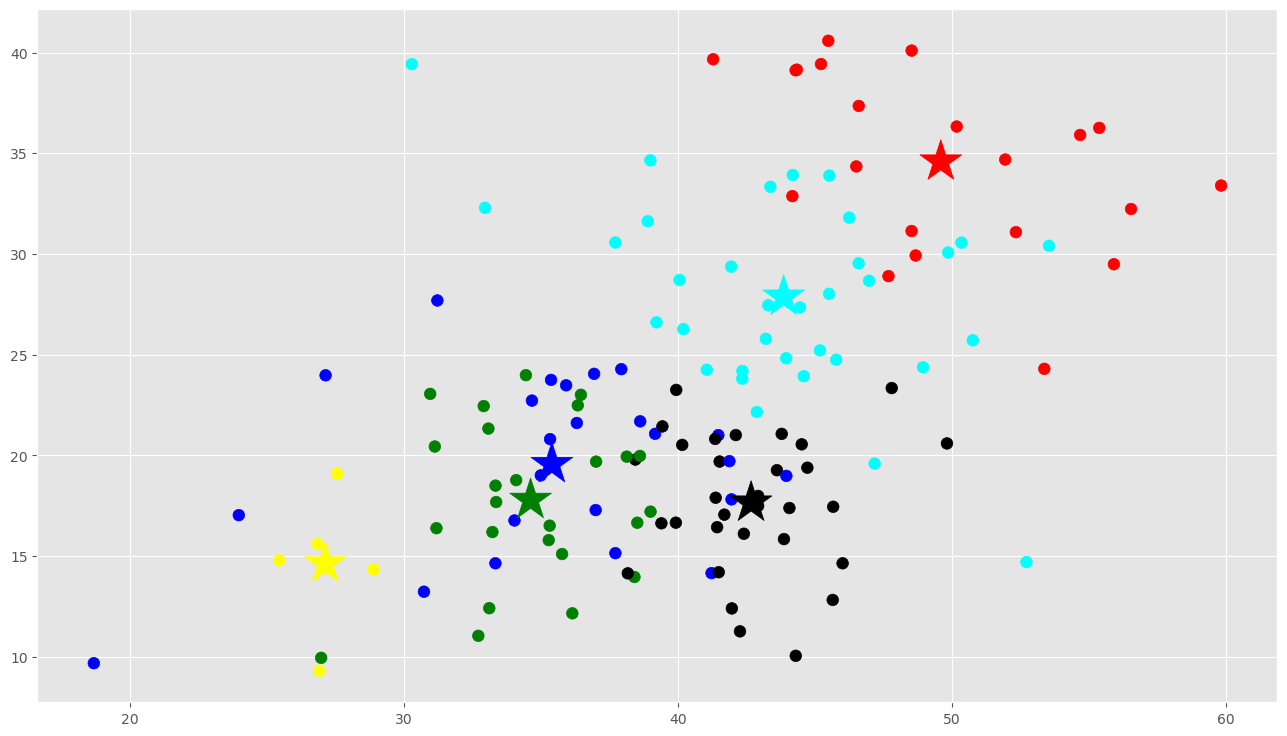

In [32]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

'''
# este codigo comentado agrega las categorias sobre cada punto
for label, x, y in zip(dataframe['categoria'].values, f1, f2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

# ANALIZAR

¿Qué puedes interpretar de los gráficos anteriores?


¿Qué pasa con los grupos?

In [34]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,24
1,red,21
2,green,25
3,yellow,5
4,cyan,34
5,black,31


# ANALIZAR

¿Qué indican las cantidades frente a cada categoría en la siguiente tabla?

In [36]:

group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,5.0
2,2,2.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,1.0
7,7,4.0
8,8,8.0
9,9,1.0


In [37]:
#imprimimos en pantalla los usuarios con categoria 2 del grupo
for index, row in group_referrals.iterrows():
    if row["categoria"] == 2:
        print (row["usuario"], row["categoria"],row["label"])

jtimberlake 2 0
thelittleidiot 2 0


Buscaremos los usuarios que están más cerca a los centroides de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

In [39]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 91,  35, 100,  66,  38,  94], dtype=int64)

In [40]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

kobebryant
DaniMateoAgain
MeganFox516
JerrySeinfeld
David_Busta
LeoDiCaprio


In [41]:
#miramos los usuarios del grupo 0
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["usuario"], row["categoria"],row["label"])

aguerosergiokun 7 0
antoniobanderas 1 0
BarackObama 8 0
Carrie_Br4dshaw 3 0
cesarmillan 4 0
Clyburn 8 0
Diane_Keaton 1 0
HerreraBeutler 8 0
HillaryClinton 8 0
hughlaurie 4 0
jiminhofe 8 0
jimlangevin 8 0
jk_rowling 9 0
jtimberlake 2 0
kobebryant 7 0
paugasol 7 0
Rep_Hunter 8 0
SarahPalinUSA 8 0
SJP 1 0
SSantiagosegura 1 0
stevewoz 6 0
thelittleidiot 2 0
tomhanks 1 0
usainbolt 7 0


# Clasificación de nuevos registros

finalmente podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos. Vemos el ejemplo con el usuario de David Guetta y nos devuelve el grupo al que pertenece 

In [43]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

#NOTA: en el array podemos poner más de un array para evaluar a varios usuarios nuevos a la vez

[5]


# Análisis con componentes principales

### 📐 Polinomio característico

Para una matriz cuadrada \( A \), los valores propios \( \lambda \) se obtienen resolviendo la siguiente ecuación:

\[
\det(A - \lambda I) = 0
\]

Donde:

- \( \det \) es el determinante
- \( I \) es la matriz identidad del mismo tamaño que \( A \)
- \( \lambda \) son los valores propios
res propios
res propios
es propios
ores propios
$$

# 📊 Análisis de Componentes Principales (PCA): Fórmulas y Conceptos Clave

PCA es una técnica para **reducir la dimensionalidad** de datos proyectándolos en nuevas variables (componentes principales) que capturan la mayor varianza posible.

## 1. Centrado de los datos

Se resta la media de cada variable para centrar los datos:

$$
X_{\text{centrado}} = X -  \bar{X}
$$

donde

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^n x_i
$$

## 2. Matriz de covarianza

Se calcula la matriz de covarianza de los datos centrados:

$$
\Sigma = \frac{1}{n-1} X_{\text{centrado}}^T X_{\text{centrado}}
$$

## 3. Descomposición espectral

Se calculan los valores propios (\($ \lambda_j $\)) y vectores propios (\($ v_j $\)) de \( $\Sigma $\):

$$
\Sigma v_j = \lambda_j v_j
$$

- \( $v_j $\): vector propio (componente principal)
- \( $\lambda_j $\): valor propio (varianza explicada por \( $v_j $\))

### 📐 Calcular el Polinomio característico para obtención de ( $\Sigma $\) y (\($ \lambda $\))

Para una matriz cuadrada ( $\Sigma $\), los valores propios (\($ \lambda $\)) se obtienen resolviendo la siguiente ecuación:

$$
\det(\Sigma - \lambda I) = 0
$$

Donde:

- \( \det \) es el determinante
- \( I \) es la matriz identidad del mismo tamaño que \( sigma \)
- \( \lambda \) son los valores propios

Para cada (\($ \lambda $\)) resolver:

$$
(\Sigma - \lambda I)v = 0
$$
  es propios


## 4. Ordenar componentes

Se ordenan los valores propios de mayor a menor:

$$
\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_d
$$

y se seleccionan las primeras \( k \) componentes principales para la reducción dimensional.

## 5. Proyección de los datos

Los datos originales se proyectan en el subespacio definido por las componentes principales:

$$
Z = X_{\text{centrado}} V_k
$$

donde

- \( $V_k = [v_1, v_2, \ldots, v_k] $\) es la matriz con los primeros \( $k $\) vectores propios como columnas,
- \( $Z $\) es la representación reducida de los datos.

## Interpretación

- Cada componente principal es una combinación lineal de las variables originales.
- La varianza total explicada por las primeras \( $k $\) componentes es:

$$
\frac{\sum_{j=1}^k \lambda_j}{\sum_{j=1}^d \lambda_j}
$$


 columnas,
- \( Z \) es la representación reducida de los datos.

---

## Interpretación

- Cada componente principal es una combinación lineal de las variables originales.
- La varianza total explicada por las primeras \( k \) componentes es:

\[
\frac{\sum_{j=1}^k \lambda_j}{\sum_{j=1}^d \lambda_j}
\]

---

¿Quieres un ejemplo numérico o código Python para calcular PCA paso a paso?


In [48]:
# Análisis con componentes principales
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df_mod = dataframe.copy()
X_PCA = df_mod.drop(['categoria','usuario'], axis='columns')

In [49]:
X_PCA

,op,co,ex,ag,ne,wordcount
0,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945
1,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970
2,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604
3,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538
4,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645
...,...,...,...,...,...,...
135,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420
136,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625
137,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065
138,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107


In [50]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X_PCA)
modelo_pca = pca_pipe.named_steps['pca']

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.44010893 0.21092089 0.12155993 0.10509086 0.07981522 0.04250417]
Las componentes explican el 0.95 del dataset son: 4


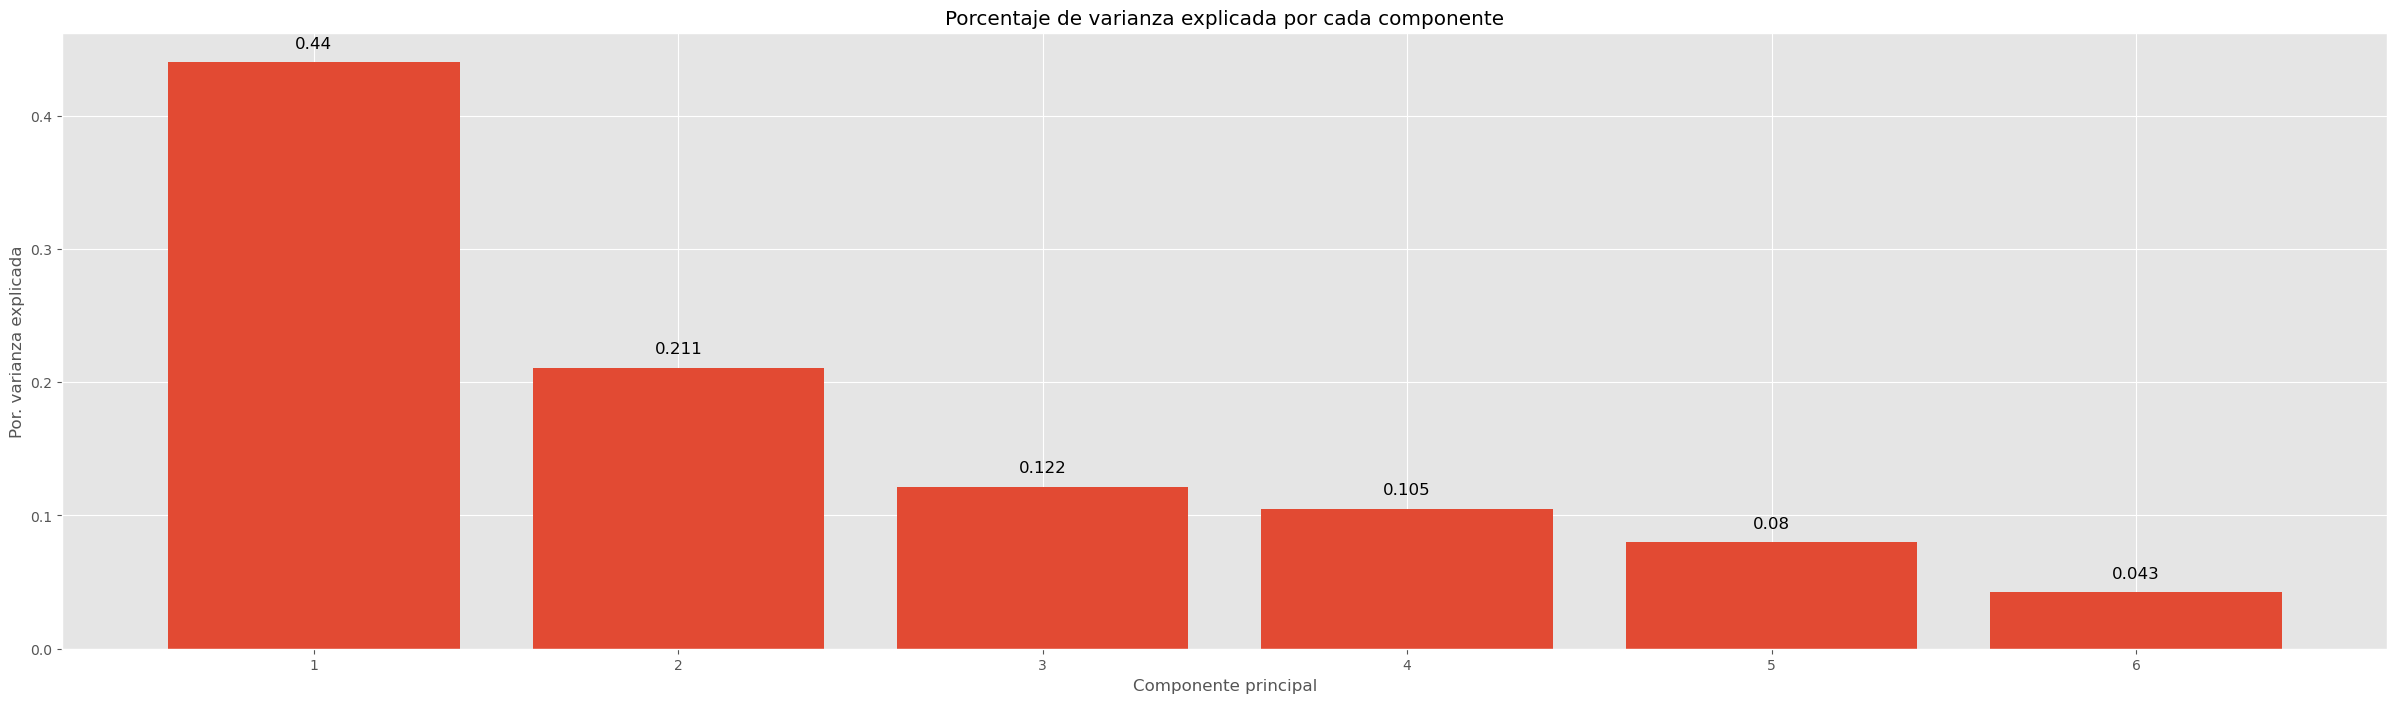

In [51]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
explica_set = 0.95
contar = 0
labelT = 0
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 8))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_,
)

for x, y in zip(np.arange(len(X_PCA.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 3)
    labelT = labelT+label
    if labelT <= explica_set:
        contar = contar + 1
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        size=12
    )
print("Las componentes explican el "+str(explica_set)+" del dataset son: "+str(contar))
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
#ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [52]:
# Reducción de dimensionalidad de los ejemplos
X_reduced = PCA(n_components=int(contar)).fit_transform(X_PCA)


C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

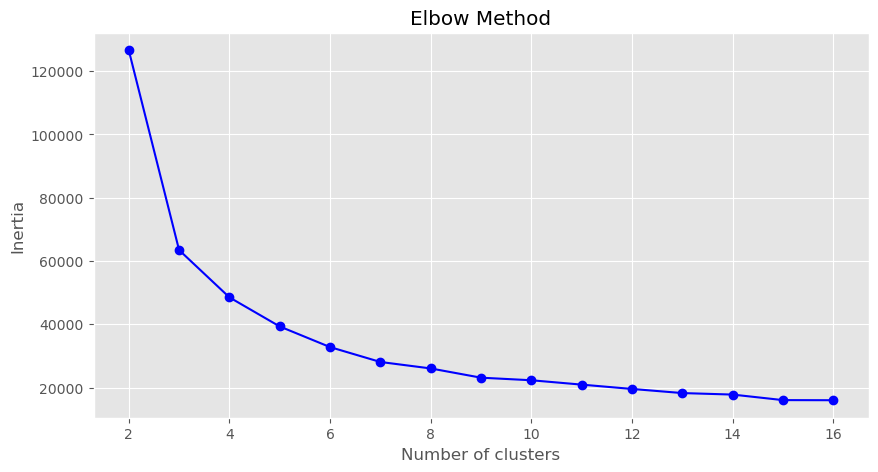

In [53]:
plt.subplots(figsize=(10, 5))
inertia = list()
for i in range(2, 17):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_reduced)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 17), inertia, 'bx-', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

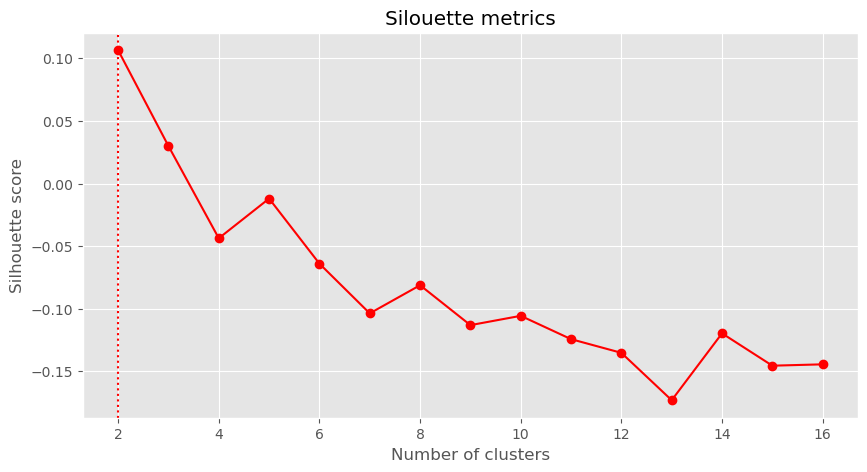

In [54]:
plt.subplots(figsize=(10, 5))

sil_scores = list()
for i in range(2, 17):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_reduced)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 17), sil_scores, color = 'red', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silouette metrics')
plt.axvline(x = sil_scores.index(max(sil_scores))+2, linestyle = 'dotted', color = 'red') 
plt.show()

In [55]:
n_digits = 6
kmeans_pca = KMeans(init="k-means++", n_clusters=n_digits, n_init=10, max_iter=100, random_state=42).fit(X_reduced)

C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 1600x900 with 0 Axes>

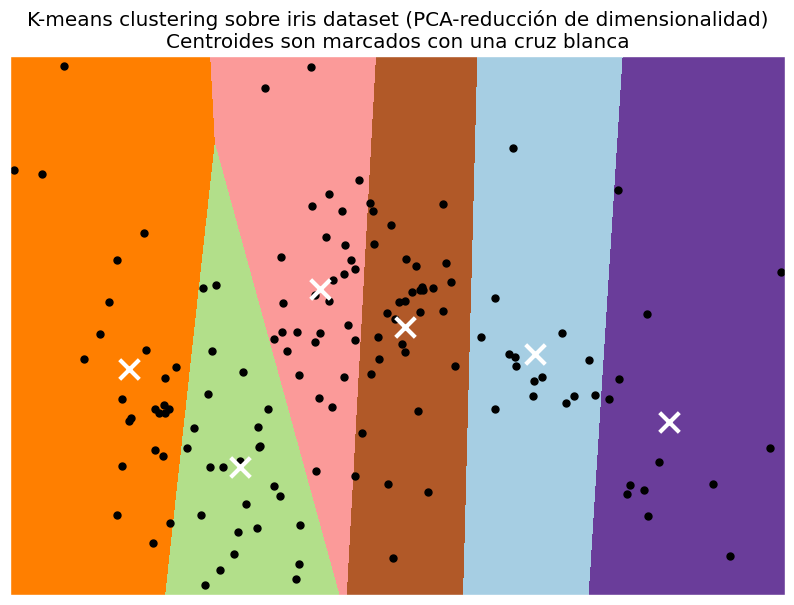

In [56]:
reduced_data = PCA(n_components=2).fit_transform(X_PCA)
kmeans_pca = KMeans(init="k-means++", n_clusters=n_digits, n_init=10, max_iter=100, random_state=42)
kmeans_pca.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.subplots(figsize=(10, 7))
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=10)
# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=200,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering sobre iris dataset (PCA-reducción de dimensionalidad)\n"
    "Centroides son marcados con una cruz blanca"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\m_mir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


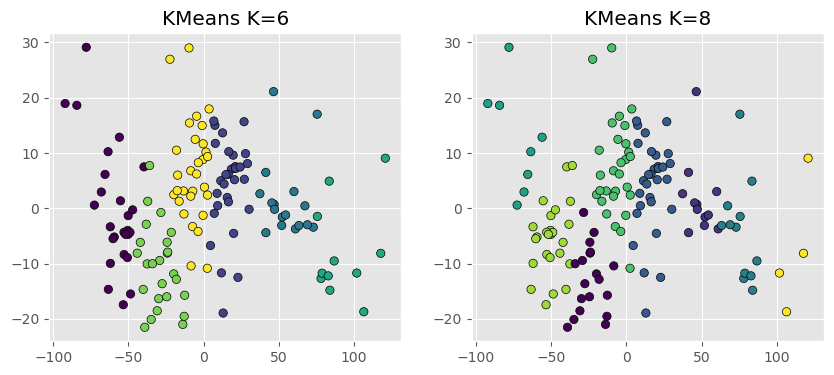

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
# ==============================================================================
y_predict = KMeans(init="k-means++", n_clusters=n_digits, n_init=10, max_iter=100).fit_predict(reduced_data)
#KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = reduced_data[:, 0],
        y = reduced_data[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=6');

# Resultados para K = 6
# ==============================================================================
y_predict = KMeans(init="k-means++", n_clusters=8, n_init=10, max_iter=100).fit_predict(reduced_data)
#KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = reduced_data[:, 0],
        y = reduced_data[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=8');

# CONCLUSIONES

¿Cuáles serían las conclusiones?

NOTA FINAL: Los resultados obtenidos pueden varias de ejecución en ejecución pues al inicializar aleatoriamente los centroids, podemos obtener grupos distintos o los mismos pero en distinto orden y color